In [1]:
# Pclass   fare
# 1    87
# 2    21
# 3    13

# title
#   {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}


# FareStage
#     data.loc[data['Fare'] < mean_fare[1], 'FareStage'] = 1
#     data.loc[(data['Fare'] > mean_fare[1]) & (data['Fare'] < mean_fare[2]), 'FareStage'] = 2
#     data.loc[(data['Fare'] > mean_fare[2]) & (data['Fare'] < mean_fare[3]), 'FareStage'] = 3
#     data.loc[data['Fare'] > mean_fare[3],'FareStage'] = 4

# Age 15,32,60



# cabin_extract(data):  #  1-L  2-M  3-H

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.cross_validation import KFold

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#data_test = pd.read_csv("/Users/ZHAOFENG SHANG/Desktop/NoteBook/Kaggle_Titanic/test.csv")

c:\users\zhaofeng shang\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
id_list = test_data["PassengerId"]
train_data = train_data.drop(['PassengerId'], axis=1)
test_data = test_data.drop(['PassengerId'], axis=1)

In [8]:
train_data.groupby('Age').count()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,
0.42,1,1,1,1,1,1,1,1,0,1
0.67,1,1,1,1,1,1,1,1,0,1
0.75,2,2,2,2,2,2,2,2,0,2
0.83,2,2,2,2,2,2,2,2,0,2
0.92,1,1,1,1,1,1,1,1,1,1
1.00,7,7,7,7,7,7,7,7,1,7
2.00,10,10,10,10,10,10,10,10,3,10
3.00,6,6,6,6,6,6,6,6,1,6
4.00,10,10,10,10,10,10,10,10,3,10


In [9]:
train_data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 59.2+ KB


In [11]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# missing values exist in columns Age, Embarked and Cabin. 


def feature_normalization(feat_vector):
    # scala value to [-1, +1]
    max_value = max(feat_vector)
    min_value = min(feat_vector)
    mean_value = feat_vector.mean()
    return (feat_vector - mean_value) / (max_value - min_value)

def dummy(data, columns):  # temporarily just for Embarked
    for column in columns:
        if column not in data.columns:
            continue
        dummy_data = pd.get_dummies(data[column], drop_first=False,prefix='Embarked')
       # print(dummy_data)
        # rename columns: column name + 1,2,3
#         num = len(dummy_data.loc[1, :])# get one row to get len
#         dummy_data.columns = [column+str(x+1) for x in range(num)]
        data = pd.concat([data, dummy_data], axis=1)

        data = data.drop(column, axis=1)
    return data

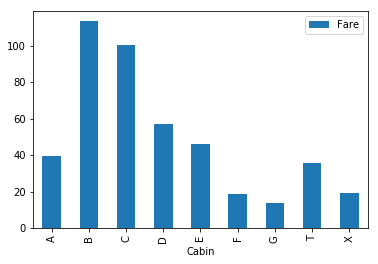

In [13]:
data=train_data
data['Cabin'] = data['Cabin'].fillna('X')
data['Cabin'] = data['Cabin'].apply(lambda x: str(x)[0])
data1=data[['Cabin','Fare']]
gg = data1.groupby('Cabin')
gg.mean().plot(kind='bar')

In [14]:
def cabin_extract(data):  #  1-L  2-M  3-H
    # classify Cabin by fare
    data['Cabin'] = data['Cabin'].fillna('X')
    data['Cabin'] = data['Cabin'].apply(lambda x: str(x)[0])
    data['Cabin'] = data['Cabin'].replace(['A', 'D', 'E', 'T'], int(1))
    data['Cabin'] = data['Cabin'].replace(['B', 'C'], int(2))
    data['Cabin'] = data['Cabin'].replace(['F', 'G'], int(3))
    data['Cabin'] = data['Cabin'].replace(['X'], int(0))
   # data['Cabin'] = data['Cabin'].map({'X': 0, 'L': 1, 'M': 2, 'H': 3}).astype(int)
    return data

In [15]:
train_data = cabin_extract(train_data)
test_data = cabin_extract(test_data)

In [16]:
gg.mean()

,Fare
Cabin,
A,39.623887
B,113.505764
C,100.151341
D,57.244576
E,46.026694
F,18.696792
G,13.581250
T,35.500000
X,19.157325


In [17]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,0,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,1,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


In [18]:
# def SexByPclass(data):
#     data['Sex'] = data['Sex'].map({'female': 1, 'male':0})
#     data['Sex'] = data['Sex'].astype(int)
#     data['Pclass'] = data['Pclass'].map({1: 3, 2: 2, 3:1}).astype(int)
#     # data['SexByPclass'] = feature_normalization((data['SexTemp'] * data['Pclass']).astype(int))
#     data.loc[data['Sex']==0, 'SexByPclass'] = data.loc[data['Sex']==0, 'Pclass']
#     data.loc[data['Sex']==1, 'SexByPclass'] = data.loc[data['Sex']==1, 'Pclass'] + 3
#     data['SexByPclass'] = data['SexByPclass'].astype(int)
#     return data

# train_data = SexByPclass(train_data)
# test_data = SexByPclass(test_data)

def SexByPclass(data):
    data['Sex'] = data['Sex'].map({'female': 1, 'male':0})
    return data
train_data = SexByPclass(train_data)
test_data = SexByPclass(test_data)

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       891 non-null int64
Embarked    889 non-null object
dtypes: float64(2), int64(6), object(3)
memory usage: 66.2+ KB


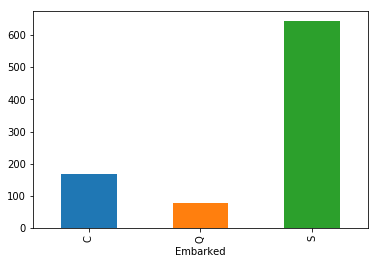

In [20]:
em = train_data['Embarked']
em.groupby(em).count().plot(kind='bar')

In [21]:
# beacuse there are only two missing value in the Embarked, so give them S

def fill_missing_embarked(data):
    freq_port = data['Embarked'].mode()[0]
    data['Embarked'] = data['Embarked'].fillna(freq_port)
    data['Embarked'] = data['Embarked'].map({'S': 0, 'Q': 1, 'C': 2}).astype(int)
    return data

train_data = fill_missing_embarked(train_data)
test_data = fill_missing_embarked(test_data)


In [22]:
train_data.info()

# After deal with Embarked('S') and Cabin(X), there is only Age has missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       891 non-null int64
Embarked    891 non-null int32
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 66.2+ KB


In [23]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0
5,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,0,1
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,1,0
7,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0,2


In [24]:
# Here, deal with the Fare, combine the train and test dataset of mean to discretized values
def fare_stage(data, mean_fare):
    data.loc[data['Fare'] > mean_fare[1], 'FareStage'] = 1
    data.loc[(data['Fare'] > mean_fare[2]) & (data['Fare'] <= mean_fare[1]), 'FareStage'] = 2
    data.loc[(data['Fare'] > mean_fare[3]) & (data['Fare'] <= mean_fare[2]), 'FareStage'] = 3
    data.loc[data['Fare'] <=mean_fare[3],'FareStage'] = 4
    return data
combine = pd.concat([train_data.drop('Survived',axis=1), test_data])
mean_fare = combine.groupby('Pclass')['Fare'].mean().astype(int)
print(mean_fare)
train_data = fare_stage(train_data, mean_fare)
test_data = fare_stage(test_data, mean_fare)

Pclass
1    87
2    21
3    13
Name: Fare, dtype: int32


In [25]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareStage
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,4.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2,2,2.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,4.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,0,2.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,4.0
5,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,0,1,4.0
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,1,0,2.0
7,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0,0,2.0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0,0,4.0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0,2,2.0


In [26]:
#  extract all Mr Miss. etc
def name_extract(data):
    # extract Title from name
    data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)
    # delete rare title
    data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

    title_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    data['Title'] = data['Title'].map(title_map).astype(int)
                                            
    return data.drop('Name', axis=1) 



train_data = name_extract(train_data)
test_data = name_extract(test_data)

In [27]:
def family_info(data):
    data['FamliySize'] = data['SibSp'] + data['Parch'] + 1
    data['Alone'] = data['Alone'] = (data['SibSp'] == 0) & (data['Parch'] == 0)
    data['Alone'] = data['Alone'].astype(int)
    return data
    
train_data = family_info(train_data)
test_data = family_info(test_data)

In [28]:
train_data.loc[train_data.Age.notnull(),:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareStage,Title,FamliySize,Alone
0,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0,4.0,1,2,0
1,1,1,1,38.0,1,0,PC 17599,71.2833,2,2,2.0,3,2,0
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,4.0,2,1,1
3,1,1,1,35.0,1,0,113803,53.1000,2,0,2.0,3,2,0
4,0,3,0,35.0,0,0,373450,8.0500,0,0,4.0,1,1,1
6,0,1,0,54.0,0,0,17463,51.8625,1,0,2.0,1,1,1
7,0,3,0,2.0,3,1,349909,21.0750,0,0,2.0,4,5,0
8,1,3,1,27.0,0,2,347742,11.1333,0,0,4.0,3,3,0
9,1,2,1,14.0,1,0,237736,30.0708,0,2,2.0,3,2,0
10,1,3,1,4.0,1,1,PP 9549,16.7000,3,0,3.0,2,3,0


In [29]:

# title_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
#  use each layer of mean to fill
def agge(data):
    
    data_not = data.loc[train_data.Age.notnull(),:]
    Mr = data_not[data_not['Title']==1].Age.mean().astype(int)
    Miss = data_not[data_not['Title']==2].Age.mean().astype(int)
    Mrs = data_not[data_not['Title']==3].Age.mean().astype(int)
    Master = data_not[data_not['Title']==4].Age.mean().astype(int)
    Rare = data_not[data_not['Title']==5].Age.mean().astype(int)
    
    data.loc[(data.Age.isnull())&(data['Title']==1),'Age']=Mr
    data.loc[(data.Age.isnull())&(data['Title']==2),'Age']=Miss
    data.loc[(data.Age.isnull())&(data['Title']==3),'Age']=Mrs
    data.loc[(data.Age.isnull())&(data['Title']==4),'Age']=Master
    data.loc[(data.Age.isnull())&(data['Title']==5),'Age']=Rare
    
    return data


train_data = agge(train_data)
test_data = agge(test_data)

In [30]:

# def fill_missing_age(train_set, test_set):
#     '''
#     combina train and test data set,
#     using linear regression to fill missing value of age in two data sets
#     return: tuple constructed by train and test data set
#     '''
#     train_dropped = train_set[['Pclass', 'SibSp', 'Fare', 'FamliySize', 'Alone', 'Age']]
#     test_dropped = test_set[['Pclass', 'SibSp', 'Fare', 'FamliySize', 'Alone', 'Age']]
#     combine = pd.concat([train_dropped,test_dropped])
#     # training regression model
#     train = combine[combine.Age.notnull()]
#     model = LinearRegression()
#     model.fit(train.drop(['Age'], axis=1), train['Age'])
    
#     data = combine.loc[combine.Age.isnull()]
#     predict_ages = model.predict(data.drop('Age', axis=1))
#     combine.loc[combine.Age.isnull(), 'Age'] = predict_ages
#     combine['Age'] = combine['Age'].astype(int)
#     train_set['Age'] = combine.iloc[:len(train_set)]['Age']
#     test_set['Age'] = combine.iloc[len(train_set):]['Age']

#     return train_set, test_set

# train_data, test_data = fill_missing_age(train_data, test_data)

In [31]:
# After finishing, discretized age

def age_extract(data):
    # From the upper kde plot, these two kde convex have some junctions.
    # When the green line is higher than the blue one, 
    # it indicates that the peopel whose age are in this stage have more opportunity to survive.
    data.loc[data['Age'] < 15, 'Age'] = 1
    data.loc[(data['Age'] < 32) & (data['Age'] > 14.9), 'Age'] = 2
    data.loc[(data['Age'] < 60) & (data['Age'] > 31.9), 'Age'] = 3
    data.loc[data['Age'] > 59.9, 'Age'] = 4
    data['Age'] = data['Age'].astype(int)
    return data

train_data = age_extract(train_data)
test_data = age_extract(test_data)

In [32]:
train_data = dummy(train_data, ['Embarked'])
test_data = dummy(test_data, ['Embarked'])
train_data = train_data.drop(['Ticket'],axis=1)
test_data = test_data.drop(['Ticket'],axis=1)

In [33]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,FareStage,Title,FamliySize,Alone,Embarked_0,Embarked_1,Embarked_2
0,0,3,0,3,1,0,7.2500,0,4.0,1,2,0,1,0,0
1,1,1,1,2,1,0,71.2833,2,2.0,3,2,0,0,0,1
2,1,3,1,3,0,0,7.9250,0,4.0,2,1,1,1,0,0
3,1,1,1,2,1,0,53.1000,2,2.0,3,2,0,1,0,0
4,0,3,0,2,0,0,8.0500,0,4.0,1,1,1,1,0,0
5,0,3,0,2,0,0,8.4583,0,4.0,1,1,1,0,1,0
6,0,1,0,2,0,0,51.8625,1,2.0,1,1,1,1,0,0
7,0,3,0,1,3,1,21.0750,0,2.0,4,5,0,1,0,0
8,1,3,1,3,0,2,11.1333,0,4.0,3,3,0,1,0,0
9,1,2,1,1,1,0,30.0708,0,2.0,3,2,0,0,0,1


In [34]:
train_data= train_data.drop(['Fare'],axis=1)
test_data= test_data.drop(['Fare'],axis=1)

# GridSearch

In [35]:
# search for the best parameters of random forest
def parameter_evaluate(data):
    clf_ev = RandomForestClassifier()
    x, y = data.drop(['Survived'], axis=1), data['Survived']
    parameters = {'n_estimators': [100, 300], 'max_features': [3, 4, 5, 'auto'],
                  'min_samples_leaf': [9, 10, 12], 'random_state': [7]}
    grid_search = GridSearchCV(estimator=clf_ev, param_grid=parameters, cv=10, scoring='accuracy')
    print("parameters:")
    # train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
    grid_search.fit(x, y)
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    bsp = grid_search.best_estimator_.get_params()  # the dict of parameters with best score
    
    for param_name in sorted(bsp.keys()):
        print("\t%s: %s" % (param_name, bsp[param_name]))
    return bsp

parameters = parameter_evaluate(train_data)  
# we don't need to search everytime after getting best parameters
# if we haven't change anything, we can use the following parameters to accelebrate our code
# parameters = {'n_estimators': 100, 'max_features': 5, 'min_samples_leaf': 10, 'random_state': 7}
rf = RandomForestClassifier(**parameters)# ** represent put all values in a single presentation of parameters
rf.fit(train_data.drop(['Survived'], axis=1), train_data['Survived'])

parameters:
Best score: 0.833
Best parameters set:
	bootstrap: True
	class_weight: None
	criterion: gini
	max_depth: None
	max_features: 3
	max_leaf_nodes: None
	min_impurity_decrease: 0.0
	min_impurity_split: None
	min_samples_leaf: 9
	min_samples_split: 2
	min_weight_fraction_leaf: 0.0
	n_estimators: 100
	n_jobs: 1
	oob_score: False
	random_state: 7
	verbose: 0
	warm_start: False


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [41]:
test_data.loc[(test_data.FareStage.isnull()),'FareStage']=0


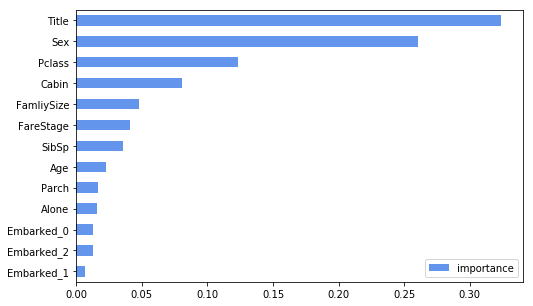

In [42]:

names = train_data.drop(['Survived'], axis=1).columns
ratios = rf.feature_importances_

feature_important = pd.DataFrame(index=names, data=ratios, columns=['importance'])
feature_important = feature_important.sort_values(by=['importance'], ascending=True)
feature_important.plot(kind='barh', stacked=True, color=['cornflowerblue'], grid=False, figsize=(8, 5))

In [43]:

lr = LogisticRegression(random_state=7)
lr.fit(train_data.drop(['Survived'], axis=1), train_data['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=7, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
pd.DataFrame({"columns":list(train_data.columns)[1:], "coef":list(lr.coef_.T)})

,coef,columns
0,[-0.580388078059],Pclass
1,[2.28552132097],Sex
2,[-0.27191756589],Age
3,[-0.404539068415],SibSp
4,[-0.262886578234],Parch
5,[0.246853451517],Cabin
6,[-0.100049057693],FareStage
7,[0.437252848563],Title
8,[-0.0593232284182],FamliySize
9,[-0.472863254462],Alone


In [45]:
from sklearn import cross_validation

X = train_data.as_matrix()[:,1:]
Y = train_data.as_matrix()[:,0]
print (cross_validation.cross_val_score(lr, X, Y, cv=10))
print (cross_validation.cross_val_score(lr, X, Y, cv=10).mean())

[ 0.8         0.81111111  0.76404494  0.82022472  0.82022472  0.79775281
  0.78651685  0.80898876  0.79775281  0.79545455]
0.800207127454


# KNN

In [46]:
knn = KNeighborsClassifier()
knn.fit(train_data.drop(['Survived'], axis=1), train_data['Survived'])
X = train_data.as_matrix()[:,1:]
Y = train_data.as_matrix()[:,0]
print (cross_validation.cross_val_score(knn, X, Y, cv=10))
print (cross_validation.cross_val_score(knn, X, Y, cv=10).mean())

[ 0.8         0.78888889  0.76404494  0.83146067  0.83146067  0.79775281
  0.78651685  0.7752809   0.80898876  0.81818182]
0.800257632505


In [646]:
result_set = pd.DataFrame({'RandomF':0.835,'LogisticR':0.802,'KNN':0.801},index=['Rate'])
result_set

,KNN,LogisticR,RandomF
Rate,0.801,0.802,0.835


In [647]:
d={'RandomF':0.835,'LogisticR':0.802,'KNN':0.801}
pd.DataFrame(d,index=[1])

,KNN,LogisticR,RandomF
1,0.801,0.802,0.835


# Ensemble RF, LR, KNN by voting


In [47]:
eclf1 = VotingClassifier(estimators=[
        ('lr', lr), ('rf', rf)], voting='soft', )  #  discard KNN coz it doesn't support bagging
eclf1 = eclf1.fit(train_data.drop(['Survived'], axis=1), train_data['Survived'])
#results = eclf1.predict(test_data)

In [48]:
from sklearn.ensemble import BaggingClassifier
# train_np = train.as_matrix()
# Y = train_np[:,0]
# X = train_np[:,1:]

bagging_clf = BaggingClassifier(eclf1,n_estimators=20)
bagging_clf.fit(train_data.drop(['Survived'], axis=1), train_data['Survived'])
# bagging_clf.fit(X,Y)

predictions = bagging_clf.predict(test_data)


In [49]:
output = pd.DataFrame({'PassengerId': id_list, "Survived": predictions})
output.to_csv('prediction2.csv', index=False)

c:\users\zhaofeng shang\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


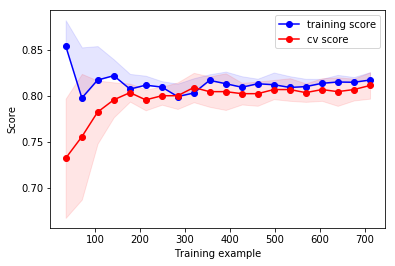

In [50]:
from sklearn.learning_curve import learning_curve
# draw the learning curve,train_sizes in 20 parts, every parts cv=5.(cross validation)
train_sizes, train_scores, test_scores = learning_curve(
bagging_clf, train_data.drop(['Survived'], axis=1),train_data['Survived'],
                             cv=5, n_jobs=1, train_sizes=np.linspace(.05, 1., 20))
# can create a array with 20*5, caluculate the mean and variance, fill those 4 lines.
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean-train_scores_std, 'o-', color="b", label=u"training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"cv score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
plt.xlabel(u"Training example")
plt.ylabel(u"Score")
plt.legend()